Analyse de Rentabilité Détaillée :
--------------------------------------------------
Revenu Total : 216035.82 €
Coût Total Serveurs : 15000.00 €
Coût Total Marketing : 50000.00 €
Coût Total Acquisition : 18510.00 €
Résultat Net Total : 132525.82 €

Rentabilité Mensuelle :
    Mois  Résultat Net
1      2   3849.644545
2      3   5797.694545
3      4   8038.234545
4      5   9832.554545
5      6  11896.624545
6      7  14061.444545
7      8  15496.164545
8      9  17050.784545
9     10  17727.294545
10    11  19537.684545
11    12  21493.944545

Premier mois rentable : Mois 2


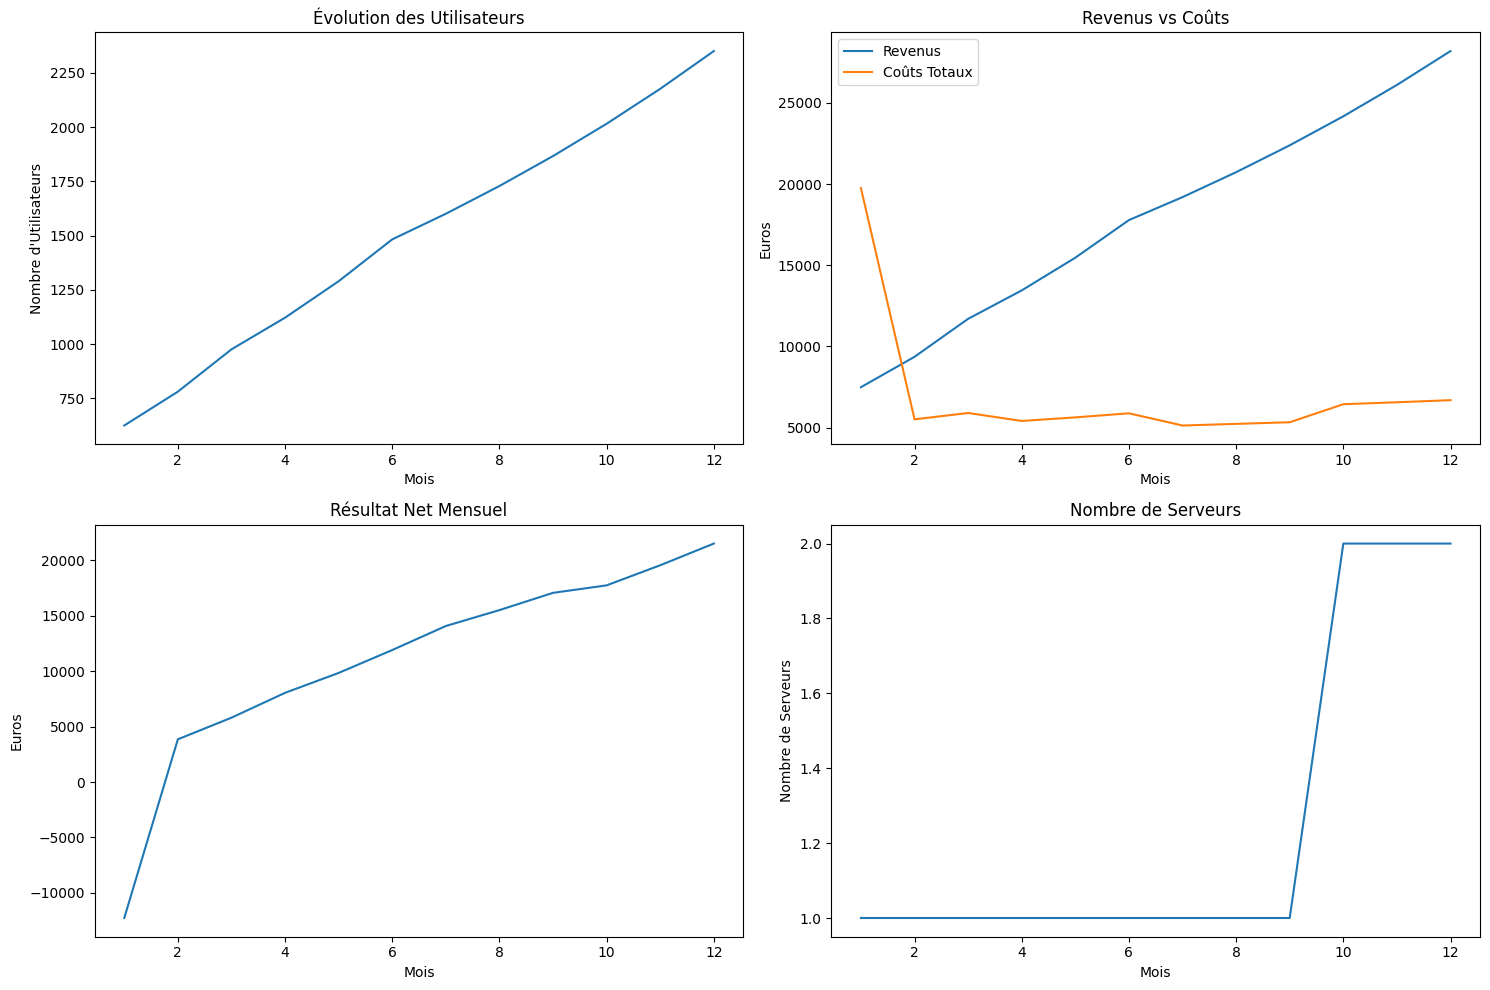

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class BusinessModelSAS:
    def __init__(self, 
                 total_market_size=400000,        # Taille totale du marché
                 market_share=0.2,                # Part de marché visée
                 initial_users=500,               # Utilisateurs initiaux
                 monthly_price=11.99,             # Prix mensuel
                 acquisition_cost=10,             # Coût d'acquisition par utilisateur
                 server_capacity=2000,            # Capacité max par serveur
                 server_cost=1000,                # Coût serveur mensuel
                 marketing_budget=50000,          # Budget marketing total
                 marketing_launch_percentage=0.35 # % du budget marketing au lancement
                ):
        self.total_market_size = total_market_size
        self.market_share = market_share
        self.initial_users = initial_users
        self.monthly_price = monthly_price
        self.acquisition_cost = acquisition_cost
        self.server_capacity = server_capacity
        self.server_cost = server_cost
        self.marketing_budget = marketing_budget
        self.marketing_launch_percentage = marketing_launch_percentage
        
        # Calcul des projections
        self.projections = self._generate_detailed_projections()
    
    def _calculate_growth_rate(self, month):
        """
        Modélise une croissance moyennement rapide
        - Décroissance progressive du taux de croissance
        """
        if month <= 3:  # Phase de lancement
            return 0.25  # Croissance de 25% les 3 premiers mois
        elif month <= 6:  # Phase de stabilisation
            return 0.15  # Croissance de 15%
        else:  # Phase de maturité
            return 0.08  # Croissance de 8%
    
    def _generate_detailed_projections(self, projection_months=12):
        projections = []
        current_users = self.initial_users
        remaining_marketing_budget = self.marketing_budget
        
        for month in range(1, projection_months + 1):
            # Calcul de la croissance
            growth_rate = self._calculate_growth_rate(month)
            new_users = int(current_users * growth_rate)
            current_users += new_users
            
            # Calcul des serveurs nécessaires
            servers_needed = max(1, np.ceil(current_users / self.server_capacity))
            server_costs = servers_needed * self.server_cost
            
            # Calcul du budget marketing
            if month == 1:
                marketing_cost = self.marketing_budget * self.marketing_launch_percentage
            else:
                # Répartition équitable du reste du budget
                marketing_cost = (remaining_marketing_budget / (projection_months - month + 1)) if remaining_marketing_budget > 0 else 0
            remaining_marketing_budget = max(0, remaining_marketing_budget - marketing_cost)
            
            # Coûts d'acquisition
            acquisition_costs = new_users * self.acquisition_cost
            
            # Revenus
            monthly_revenue = current_users * self.monthly_price
            
            # Calcul du résultat net
            total_costs = server_costs + marketing_cost + acquisition_costs
            net_result = monthly_revenue - total_costs
            
            projections.append({
                'Mois': month,
                'Utilisateurs': current_users,
                'Nouveaux Utilisateurs': new_users,
                'Nombre de Serveurs': servers_needed,
                'Revenus': monthly_revenue,
                'Coûts Serveurs': server_costs,
                'Coûts Marketing': marketing_cost,
                'Coûts Acquisition': acquisition_costs,
                'Résultat Net': net_result
            })
        
        return pd.DataFrame(projections)
    
    def analyse_rentabilite(self):
        """
        Analyse détaillée de la rentabilité
        """
        df = self.projections
        
        print("Analyse de Rentabilité Détaillée :")
        print("-" * 50)
        print(f"Revenu Total : {df['Revenus'].sum():.2f} €")
        print(f"Coût Total Serveurs : {df['Coûts Serveurs'].sum():.2f} €")
        print(f"Coût Total Marketing : {df['Coûts Marketing'].sum():.2f} €")
        print(f"Coût Total Acquisition : {df['Coûts Acquisition'].sum():.2f} €")
        print(f"Résultat Net Total : {df['Résultat Net'].sum():.2f} €")
        
        print("\nRentabilité Mensuelle :")
        rentable_months = df[df['Résultat Net'] > 0]
        if not rentable_months.empty:
            print(rentable_months[['Mois', 'Résultat Net']])
            print(f"\nPremier mois rentable : Mois {rentable_months['Mois'].min()}")
        else:
            print("Aucun mois rentable sur la période")
    
    def visualiser_projections(self):
        """
        Visualisation des projections financières
        """
        plt.figure(figsize=(15, 10))
        
        plt.subplot(2, 2, 1)
        plt.plot(self.projections['Mois'], self.projections['Utilisateurs'], label='Utilisateurs')
        plt.title('Évolution des Utilisateurs')
        plt.xlabel('Mois')
        plt.ylabel('Nombre d\'Utilisateurs')
        
        plt.subplot(2, 2, 2)
        plt.plot(self.projections['Mois'], self.projections['Revenus'], label='Revenus')
        plt.plot(self.projections['Mois'], 
                 self.projections['Coûts Serveurs'] + 
                 self.projections['Coûts Marketing'] + 
                 self.projections['Coûts Acquisition'], 
                 label='Coûts Totaux')
        plt.title('Revenus vs Coûts')
        plt.xlabel('Mois')
        plt.ylabel('Euros')
        plt.legend()
        
        plt.subplot(2, 2, 3)
        plt.plot(self.projections['Mois'], self.projections['Résultat Net'], label='Résultat Net')
        plt.title('Résultat Net Mensuel')
        plt.xlabel('Mois')
        plt.ylabel('Euros')
        
        plt.subplot(2, 2, 4)
        plt.plot(self.projections['Mois'], self.projections['Nombre de Serveurs'], label='Serveurs')
        plt.title('Nombre de Serveurs')
        plt.xlabel('Mois')
        plt.ylabel('Nombre de Serveurs')
        
        plt.tight_layout()
        plt.show()

# Utilisation
if __name__ == "__main__":
    business_model = BusinessModelSAS()
    business_model.analyse_rentabilite()
    business_model.visualiser_projections()